In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
Nyc_data = pd.read_csv("D:\AB_NYC_2019.csv")

In [4]:
Nyc_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
Nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
d = Nyc_data.isnull().sum().sum()
d

20141

In [7]:
import seaborn as sns 

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

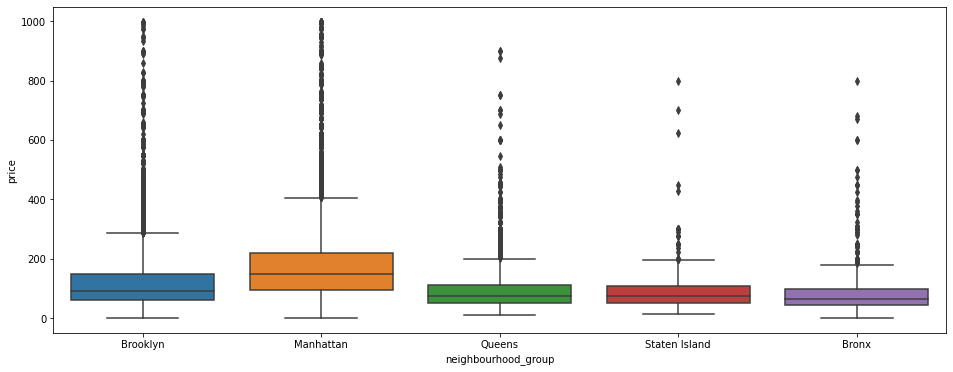

In [8]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="neighbourhood_group", y="price", data=Nyc_data[Nyc_data['price'] < 1000])

<AxesSubplot:xlabel='room_type', ylabel='minimum_nights'>

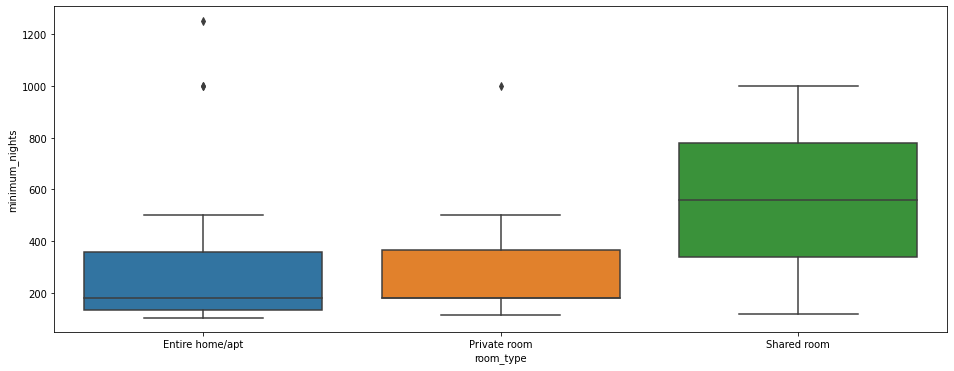

In [9]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="room_type", y="minimum_nights", data=Nyc_data[Nyc_data['minimum_nights'] > 100])

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

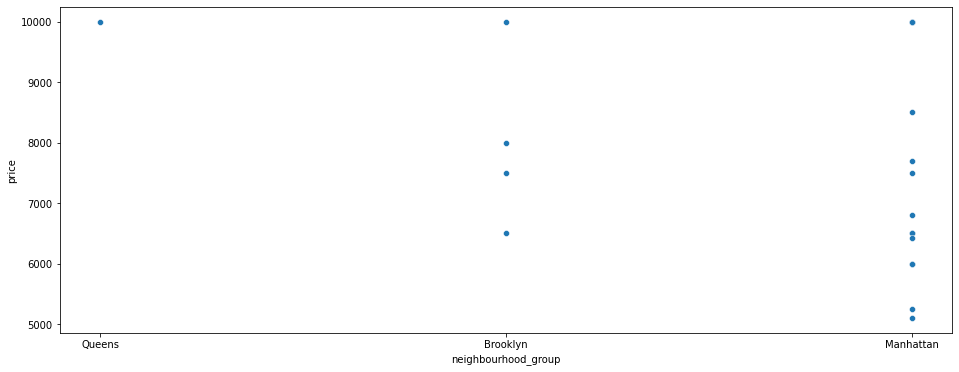

In [10]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x="neighbourhood_group", y="price", data=Nyc_data.sort_values('price', ascending=False).head(20))

### 3. Find out the neighbourhood’s average price so that I am able to pick an economical location to book my hotel.

In [13]:
print("The total number of neighbourhoods are : ", len(np.unique(Nyc_data.neighbourhood)))

The total number of neighbourhoods are :  221


In [14]:
top_prices_by_neighbourhood = Nyc_data.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price").reset_index()

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

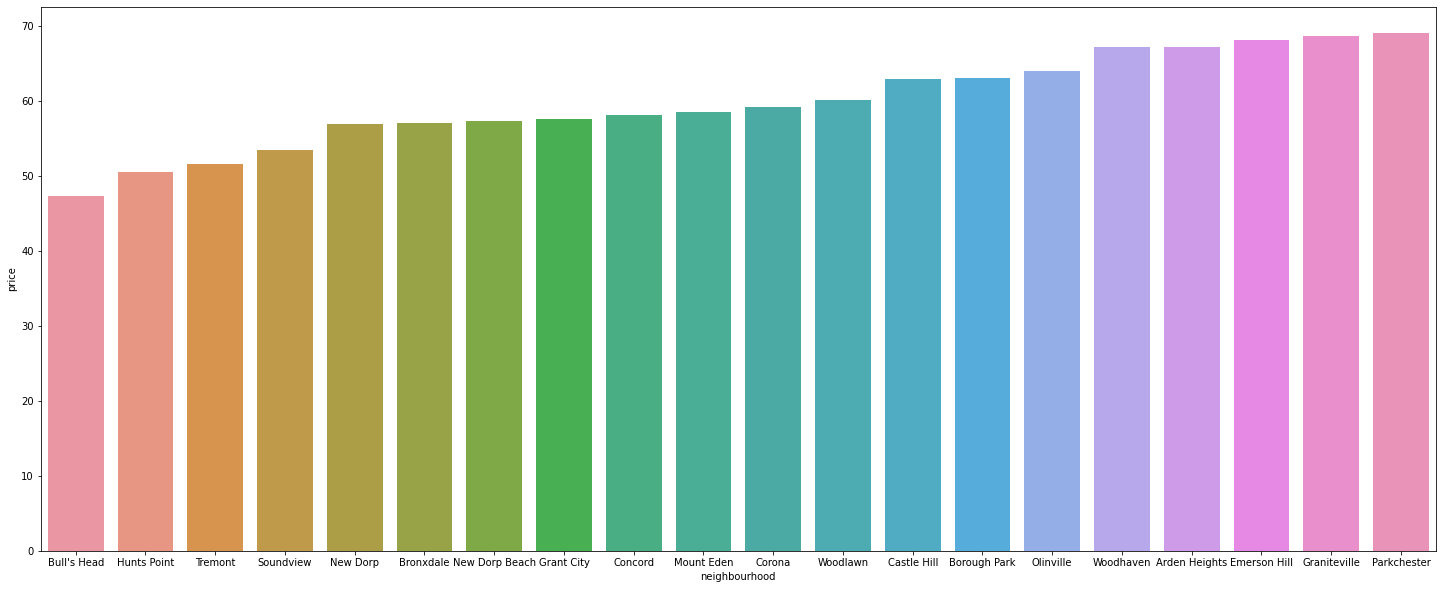

In [15]:
plt.figure(figsize=(25,10))
sns.barplot(x="neighbourhood", y="price", data=top_prices_by_neighbourhood.head(20))

In [16]:
Nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 4. Find out the 10 most popular hosts based on number_of_reviews

In [17]:
df_host_by_popularity = Nyc_data.groupby("host_id").agg({"number_of_reviews" : "sum"})#.reset.index()

In [18]:
total_reviews = Nyc_data.number_of_reviews.sum()

In [19]:
total_reviews

1138005

In [20]:
df_host_by_popularity['popularity_index'] = df_host_by_popularity['number_of_reviews']. \
                                                apply(lambda x: x/float(total_reviews)*100)

In [21]:
df_host_by_popularity.sort_values("popularity_index", ascending = False).head(10)

,number_of_reviews,popularity_index
host_id,,
37312959,2273,0.199736
344035,2205,0.193760
26432133,2017,0.177240
35524316,1971,0.173198
40176101,1818,0.159753
4734398,1798,0.157996
16677326,1355,0.119068
6885157,1346,0.118277
219517861,1281,0.112565


In [22]:
df_host_by_popularity = df_host_by_popularity.reset_index()
del df_host_by_popularity['number_of_reviews']

In [24]:
Nyc_data = pd.merge(Nyc_data, df_host_by_popularity)

In [25]:
Nyc_data.shape

(48895, 17)

### 5. Find out the top locations where people tend to stay for a longer duration (more than a week) and sort those by their popularity index

In [28]:
# 5
Nyc_data[Nyc_data.minimum_nights > 10 ].sort_values("popularity_index", ascending = False).head(20)['neighbourhood']

40233      Theater District
40284    Financial District
40165      Theater District
40169               Chelsea
40171      Theater District
40281    Financial District
40175      Theater District
40176      Theater District
40177      Theater District
40178      Theater District
40179      Theater District
40182      Theater District
40183      Theater District
40197       Upper East Side
40198       Upper East Side
40220    Financial District
40221    Financial District
40280    Financial District
40223    Financial District
40283    Financial District
Name: neighbourhood, dtype: object

### 6. Find out the most popular regions based on the host_id’s popularity_index

In [30]:
df_popular_regions = Nyc_data.groupby('neighbourhood').agg({'popularity_index' : 'sum'}).reset_index()

<AxesSubplot:xlabel='neighbourhood', ylabel='popularity_index'>

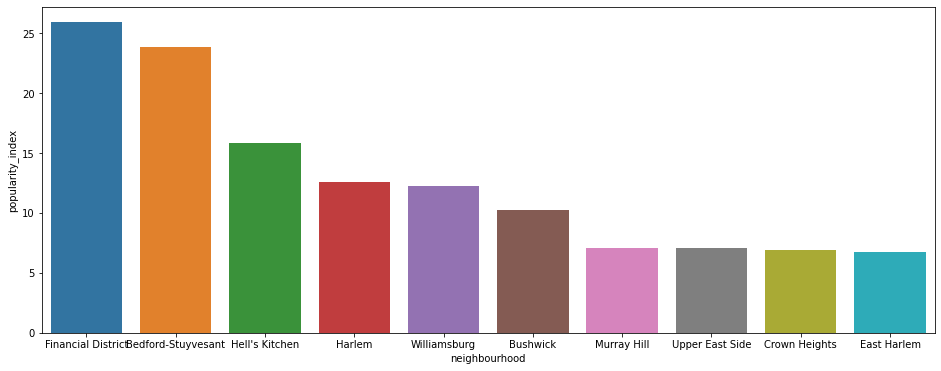

In [31]:
plt.figure(figsize=(16, 6))
sns.barplot(x='neighbourhood', y='popularity_index', data=df_popular_regions.sort_values('popularity_index', 
                                                                                        ascending=False).head(10))

### 7. Calculate host_id’s popularity in its neighbourhood

In [32]:
df_neighbourhood_sum = Nyc_data.groupby('neighbourhood').agg({'number_of_reviews': 'sum'}).reset_index()

In [33]:
df_neighbourhood_host_sum = Nyc_data.groupby(['host_id', 'neighbourhood']).agg({'number_of_reviews': 'sum'}).reset_index()

In [34]:
df_neighbourhood_sum = df_neighbourhood_sum.rename(columns = {'number_of_reviews': 'sum_of_reviews'})

In [35]:
df_neighbourhood_host_merged = pd.merge(df_neighbourhood_host_sum, df_neighbourhood_sum)

In [36]:
df_neighbourhood_host_merged

,host_id,neighbourhood,number_of_reviews,sum_of_reviews
0,2438,Williamsburg,1,85427
1,10889,Williamsburg,383,85427
2,15991,Williamsburg,148,85427
3,19402,Williamsburg,37,85427
4,21207,Williamsburg,9,85427
...,...,...,...,...
38308,115827173,Willowbrook,9,9
38309,132266502,Westerleigh,1,18
38310,164164069,Westerleigh,17,18
38311,200754542,Breezy Point,5,5


In [37]:
df_neighbourhood_host_merged['host_neighbourhood_popularity'] = df_neighbourhood_host_merged.apply(lambda x: x['number_of_reviews']/float(x['sum_of_reviews'])*100 \
                                       if x['sum_of_reviews'] != 0 else 0, 
                                                                   axis=1)

In [38]:
df_neighbourhood_host_merged.sort_values('host_neighbourhood_popularity', ascending=False)

,host_id,neighbourhood,number_of_reviews,sum_of_reviews,host_neighbourhood_popularity
37937,6402171,Rossville,21,21,100.0
38311,200754542,Breezy Point,5,5,100.0
35750,310670,Eastchester,157,157,100.0
38308,115827173,Willowbrook,9,9,100.0
38274,71312760,Richmondtown,79,79,100.0
...,...,...,...,...,...
21767,2063421,Carroll Gardens,0,5897,0.0
21772,2423401,Carroll Gardens,0,5897,0.0
21775,2724990,Carroll Gardens,0,5897,0.0
21788,3827238,Carroll Gardens,0,5897,0.0


In [39]:
del df_neighbourhood_host_merged['sum_of_reviews']
del df_neighbourhood_host_merged['number_of_reviews']

In [40]:
df_neighbourhood_host_merged[df_neighbourhood_host_merged['neighbourhood'] == 'Baychester']

,host_id,neighbourhood,host_neighbourhood_popularity
38259,57165692,Baychester,88.709677
38260,64425305,Baychester,0.967742
38261,129890157,Baychester,0.000000
38262,209306758,Baychester,6.774194
38263,246653349,Baychester,3.548387


In [42]:
Nyc_data = pd.merge(Nyc_data, df_neighbourhood_host_merged)

In [44]:
Nyc_data[Nyc_data.host_neighbourhood_popularity > 90] \
[['host_id', 'host_name', 'neighbourhood', 'neighbourhood_group', 'host_neighbourhood_popularity']]

,host_id,host_name,neighbourhood,neighbourhood_group,host_neighbourhood_popularity
347,310670,Vie,Eastchester,Bronx,100.000000
348,310670,Vie,Eastchester,Bronx,100.000000
349,310670,Vie,Eastchester,Bronx,100.000000
350,310670,Vie,Eastchester,Bronx,100.000000
351,310670,Vie,Eastchester,Bronx,100.000000
352,310670,Vie,Eastchester,Bronx,100.000000
353,310670,Vie,Eastchester,Bronx,100.000000
354,310670,Vie,Eastchester,Bronx,100.000000
355,310670,Vie,Eastchester,Bronx,100.000000
356,310670,Vie,Eastchester,Bronx,100.000000


### 8. Which neighbourhood is generating maximum and minimum revenues in terms of private rooms and entire homes?

In [45]:
df_neighbourhood_room_type = Nyc_data[Nyc_data['room_type'] != 'Shared room'].groupby(['neighbourhood', 'room_type']).agg({'price' : 'sum'})

In [46]:
df_neighbourhood_room_type

price
neighbourhood room_type             
Allerton      Entire home/apt   1969
              Private room      1710
Arden Heights Entire home/apt    228
              Private room        41
Arrochar      Entire home/apt   1897
...                              ...
Woodlawn      Entire home/apt    262
              Private room       329
Woodrow       Entire home/apt    700
Woodside      Entire home/apt   9369
              Private room     10564

[425 rows x 1 columns]

In [47]:
df_neighbourhood_room_type = pd.pivot_table(df_neighbourhood_room_type, values='price', index=['neighbourhood'], columns=['room_type'])

In [48]:
df_neighbourhood_room_type.sort_values('Private room', ascending = False).head(1)

room_type,Entire home/apt,Private room
neighbourhood,,
Williamsburg,389724.0,171265.0


In [49]:
df_neighbourhood_room_type.sort_values('Entire home/apt', ascending = False).head(1)

room_type,Entire home/apt,Private room
neighbourhood,,
Williamsburg,389724.0,171265.0


In [50]:
df_neighbourhood_room_type.sort_values('Private room', ascending = True).head(1)

room_type,Entire home/apt,Private room
neighbourhood,,
Graniteville,186.0,20.0


In [51]:
df_neighbourhood_room_type.sort_values('Entire home/apt', ascending = True).head(1)

room_type,Entire home/apt,Private room
neighbourhood,,
New Dorp,57.0,NaN
